# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from tqdm.notebook import tqdm


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Create new dataframe to store the weather data
weather_df = pd.DataFrame()

print(f'Beginning Data Retrieval')
print(f'-----------------------------')

for i in tqdm(range(len(cities))):
    city_name = cities[i]
    weather_url = f'https://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={weather_api_key}'
    weather_api_data = requests.get(weather_url).json()
    if weather_api_data['cod'] == '404':
        print(f'Processing Record {(i+1)%50} of Set {int((i+1)/50)+1} | City not found. Skipping...')
        continue
    else:
        weather_df = weather_df.append([[city_name, 
                                weather_api_data['coord']['lat'],
                                weather_api_data['coord']['lon'],
                                weather_api_data['main']['temp_max'],
                                weather_api_data['main']['humidity'],
                                weather_api_data['clouds']['all'],
                                weather_api_data['wind']['speed'],
                                weather_api_data['sys']['country'],
                                weather_api_data['dt']                           
                               ]])
        print(f'Processing Record {(i+1)%50} of Set {int((i+1)/50)+1} | {city_name}')



Beginning Data Retrieval
-----------------------------


Processing Record 1 of Set 1 | hechingen
Processing Record 2 of Set 1 | sisimiut
Processing Record 3 of Set 1 | sterling
Processing Record 4 of Set 1 | shirokiy
Processing Record 5 of Set 1 | stafford
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | sept-iles
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | pokhara
Processing Record 10 of Set 1 | dunedin
Processing Record 11 of Set 1 | City not found. Skipping...
Processing Record 12 of Set 1 | todos santos
Processing Record 13 of Set 1 | City not found. Skipping...
Processing Record 14 of Set 1 | sesvete
Processing Record 15 of Set 1 | laguna
Processing Record 16 of Set 1 | shubarshi
Processing Record 17 of Set 1 | pangody
Processing Record 18 of Set 1 | vao
Processing Record 19 of Set 1 | beroroha
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | hilo
Processing Record 23 of Set 1 | hermanus
Processing Record 24 of Set 1 |

Processing Record 41 of Set 4 | dehloran
Processing Record 42 of Set 4 | anadyr
Processing Record 43 of Set 4 | lebu
Processing Record 44 of Set 4 | mersing
Processing Record 45 of Set 4 | urumqi
Processing Record 46 of Set 4 | ampanihy
Processing Record 47 of Set 4 | barcelos
Processing Record 48 of Set 4 | flin flon
Processing Record 49 of Set 4 | prince rupert
Processing Record 0 of Set 5 | am timan
Processing Record 1 of Set 5 | ambilobe
Processing Record 2 of Set 5 | saint-georges
Processing Record 3 of Set 5 | salacgriva
Processing Record 4 of Set 5 | City not found. Skipping...
Processing Record 5 of Set 5 | zakan-yurt
Processing Record 6 of Set 5 | ambulu
Processing Record 7 of Set 5 | aktas
Processing Record 8 of Set 5 | puerto ayora
Processing Record 9 of Set 5 | darnah
Processing Record 10 of Set 5 | show low
Processing Record 11 of Set 5 | smidovich
Processing Record 12 of Set 5 | quatre cocos
Processing Record 13 of Set 5 | tiksi
Processing Record 14 of Set 5 | saint-pierr

Processing Record 32 of Set 8 | tsumeb
Processing Record 33 of Set 8 | marsabit
Processing Record 34 of Set 8 | esperanza
Processing Record 35 of Set 8 | armidale
Processing Record 36 of Set 8 | City not found. Skipping...
Processing Record 37 of Set 8 | raghunathpur
Processing Record 38 of Set 8 | City not found. Skipping...
Processing Record 39 of Set 8 | chokurdakh
Processing Record 40 of Set 8 | banjarmasin
Processing Record 41 of Set 8 | itupeva
Processing Record 42 of Set 8 | aklavik
Processing Record 43 of Set 8 | mareeba
Processing Record 44 of Set 8 | sitka
Processing Record 45 of Set 8 | hirado
Processing Record 46 of Set 8 | kerrville
Processing Record 47 of Set 8 | buzmeyin
Processing Record 48 of Set 8 | husavik
Processing Record 49 of Set 8 | geraldton
Processing Record 0 of Set 9 | gao
Processing Record 1 of Set 9 | City not found. Skipping...
Processing Record 2 of Set 9 | magadan
Processing Record 3 of Set 9 | diamantino
Processing Record 4 of Set 9 | kautokeino
Proces

Processing Record 23 of Set 12 | zharkent
Processing Record 24 of Set 12 | amaigbo
Processing Record 25 of Set 12 | rabo de peixe
Processing Record 26 of Set 12 | kunming
Processing Record 27 of Set 12 | waingapu
Processing Record 28 of Set 12 | erenhot
Processing Record 29 of Set 12 | kalengwa
Processing Record 30 of Set 12 | saskylakh
Processing Record 31 of Set 12 | irbeyskoye
Processing Record 32 of Set 12 | baruun-urt
Processing Record 33 of Set 12 | oltu
Processing Record 34 of Set 12 | bay roberts
Processing Record 35 of Set 12 | szczytno
Processing Record 36 of Set 12 | san diego de los banos
Processing Record 37 of Set 12 | souillac
Processing Record 38 of Set 12 | puerto carreno
Processing Record 39 of Set 12 | bismarck
Processing Record 40 of Set 12 | demba
Processing Record 41 of Set 12 | City not found. Skipping...
Processing Record 42 of Set 12 | belaya gora
Processing Record 43 of Set 12 | machhlishahr
Processing Record 44 of Set 12 | porto novo
Processing Record 45 of S

In [6]:
weather_df.columns=['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date']
weather_df = weather_df.reset_index(drop=True)
weather_df.to_csv(output_data_file, index=False)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        552 non-null    object 
 1   Lat         552 non-null    float64
 2   Lng         552 non-null    float64
 3   Max Temp    552 non-null    float64
 4   Humidity    552 non-null    int64  
 5   Cloudiness  552 non-null    int64  
 6   Wind Speed  552 non-null    float64
 7   Country     552 non-null    object 
 8   Date        552 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 38.9+ KB


In [8]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hechingen,48.35,8.96,287.59,17,66,1.18,DE,1588986961
1,sisimiut,66.94,-53.67,275.92,73,100,1.06,GL,1588986961
2,sterling,39.01,-77.43,282.04,87,90,4.10,US,1588986959
3,shirokiy,49.76,129.52,289.26,45,100,3.37,RU,1588986962
4,stafford,52.81,-2.12,284.26,89,0,0.89,GB,1588986735


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,5.520000e+02
mean,18.402391,15.684946,290.479873,69.898551,48.961957,3.430380,1.588987e+09
std,33.278678,90.459529,9.947077,21.871192,41.031355,2.386975,1.195544e+02
min,-54.800000,-175.200000,259.870000,4.000000,0.000000,0.110000,1.588987e+09
25%,-8.562500,-65.752500,284.260000,57.000000,1.000000,1.595000,1.588987e+09
50%,20.910000,19.985000,291.115000,74.000000,40.000000,2.915000,1.588987e+09
75%,47.235000,93.917500,299.260000,87.000000,91.000000,4.600000,1.588987e+09
max,78.220000,179.320000,309.150000,100.000000,100.000000,16.000000,1.588987e+09


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

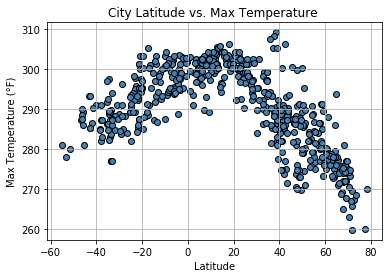

In [10]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], c='steelblue', edgecolors='black')
plt.title('City Latitude vs. Max Temperature ')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

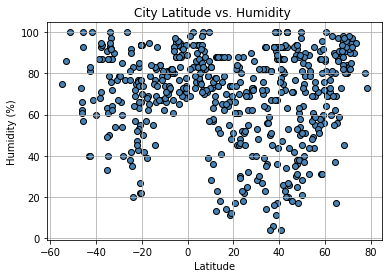

In [11]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], c='steelblue', edgecolors='black')
plt.title('City Latitude vs. Humidity ')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

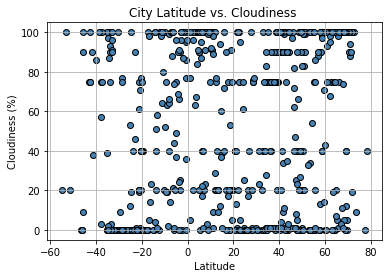

In [12]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], c='steelblue', edgecolors='black')
plt.title('City Latitude vs. Cloudiness ')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

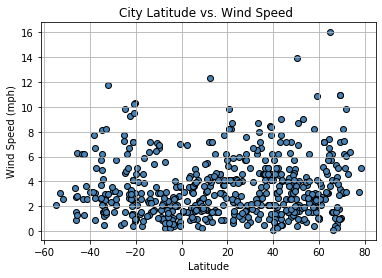

In [13]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], c='steelblue', edgecolors='black')
plt.title('City Latitude vs. Wind Speed ')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots
def liner_reg(input_df, x, y) -> tuple:
    x_values = input_df[x].astype('float')
    y_values = input_df[y].astype('float')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return (line_eq, x_values, regress_values, rvalue)

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_index = (weather_df['Lat'] >= 0)
northern_weather_df = weather_df.loc[northern_index,:]

In [16]:
southern_index = (weather_df['Lat'] < 0)
southern_weather_df = weather_df.loc[southern_index,:]

In [17]:
def plot_lin_reg(temp_df, ax, ay, py, py_label):
    """ Plot the"""
    plt.scatter(temp_df['Lat'], temp_df[py], c='steelblue', edgecolors='black')
    plt.xlabel('Latitude')
    plt.ylabel(py_label)

    # Plot regression line
    (line_eq, x_values, regress_values, rvalue) = liner_reg(temp_df, 'Lat', py)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(ax,ay),fontsize=15,color="red")
    print(f"R squared: {rvalue**2}")
    plt.show()
    return 

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.7104718601214494


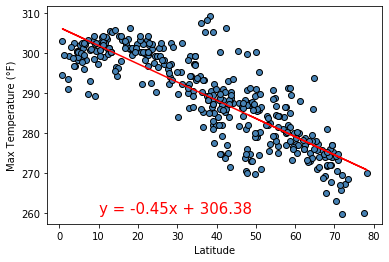

In [18]:
plot_lin_reg(northern_weather_df, 10, 260, 'Max Temp', 'Max Temperature (°F)')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.5073830481319214


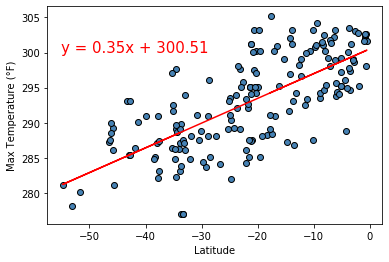

In [19]:
plot_lin_reg(southern_weather_df, -55, 300, 'Max Temp', 'Max Temperature (°F)')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.005484678159625284


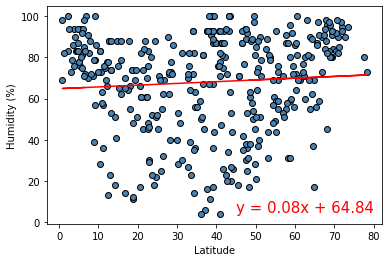

In [20]:
plot_lin_reg(northern_weather_df, 45, 5, 'Humidity', 'Humidity (%)')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.011024959807335161


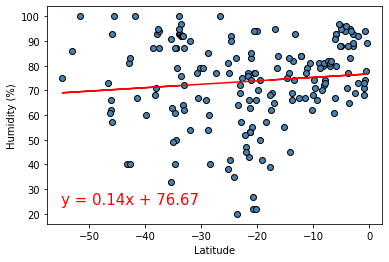

In [21]:
plot_lin_reg(southern_weather_df, -55, 24, 'Humidity', 'Humidity (%)')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.0032623869972555498


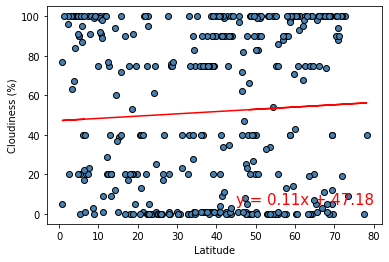

In [22]:
plot_lin_reg(northern_weather_df, 45, 5, 'Cloudiness', 'Cloudiness (%)')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.016103212770420185


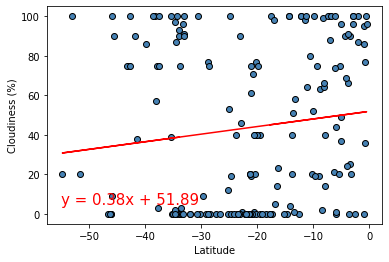

In [23]:
plot_lin_reg(southern_weather_df, -55, 5, 'Cloudiness', 'Cloudiness (%)')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.013403120329089368


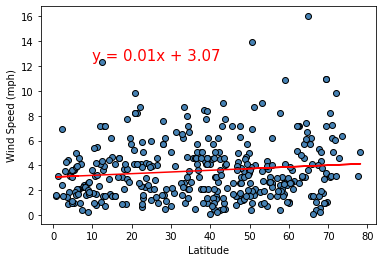

In [24]:
plot_lin_reg(northern_weather_df, 10, 12.5, 'Wind Speed', 'Wind Speed (mph)')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.03326486352759431


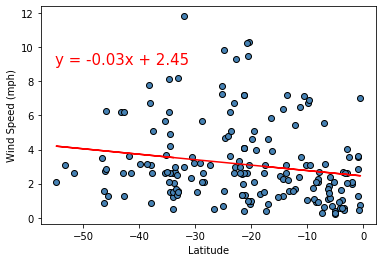

In [25]:
plot_lin_reg(southern_weather_df, -55, 9, 'Wind Speed', 'Wind Speed (mph)')